In [122]:
import keras
import tensorflow as tf
from keras.layers import Input, Dense, Flatten, Convolution2D, MaxPooling2D, Dropout, Lambda
from keras.models import Model, Sequential
from keras.datasets import mnist

In [364]:
#load and preprocess data
import numpy as np
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
"""
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
"""



X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape)
print(y_train.shape)
num_classes = 10

from keras.utils import np_utils
# convert class vectors to binary class matrices 1-hot vector
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(60000,)
(60000, 10)


(array([ 5923.,  6742.,  5958.,  6131.,  5842.,  5421.,  5918.,  6265.,
         5851.,  5949.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

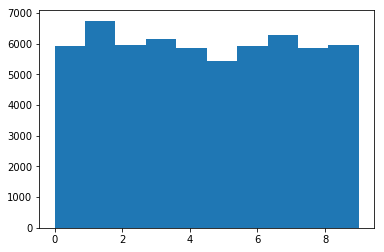

In [363]:
"""
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.hist(y_train)
"""

In [108]:
"""
print(X_train.shape[0], 'train samples', X_train.shape[1])
print(X_test.shape[0], 'test samples', X_test.shape[1])
input_size = X_train.shape[1]
"""



(60000, 10)


In [135]:

model = Sequential()

#single-layer perceptron 
"""
model.add(Flatten(input_shape=(28, 28, 1)))

model.add(Dropout(0.25))
 
model.add(Dense(10, activation=tf.nn.softmax))    
"""

#single CNN
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


"""
model.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
"""


#model = Sequential([
#    Flatten(input_shape=(28, 28)),
#    Dense(128, activation=tf.nn.relu),
#    Dense(10, activation=tf.nn.softmax)
#])




"\nmodel.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))\nmodel.add(Convolution2D(64, 3, 3, activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\n \nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(10, activation='softmax'))\n"

In [136]:
model.summary()
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ['categorical_accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_18 (Convolution2D) (None, 26, 26, 32)    320         convolution2d_input_9[0][0]      
____________________________________________________________________________________________________
maxpooling2d_10 (MaxPooling2D)   (None, 13, 13, 32)    0           convolution2d_18[0][0]           
____________________________________________________________________________________________________
dropout_11 (Dropout)             (None, 13, 13, 32)    0           maxpooling2d_10[0][0]            
____________________________________________________________________________________________________
flatten_29 (Flatten)             (None, 5408)          0           dropout_11[0][0]                 
___________________________________________________________________________________________

In [137]:
model.fit(X_train, y_train)



Epoch 1/10
60000/60000 [==============================] - 46s - loss: 0.2645 - acc: 0.9202    
Epoch 2/10
60000/60000 [==============================] - 46s - loss: 0.1169 - acc: 0.9654    
Epoch 3/10
60000/60000 [==============================] - 45s - loss: 0.0947 - acc: 0.9712    
Epoch 4/10
60000/60000 [==============================] - 46s - loss: 0.0773 - acc: 0.9762    
Epoch 5/10
60000/60000 [==============================] - 46s - loss: 0.0651 - acc: 0.9800    
Epoch 6/10
60000/60000 [==============================] - 46s - loss: 0.0598 - acc: 0.9814    
Epoch 7/10
60000/60000 [==============================] - 46s - loss: 0.0517 - acc: 0.9835    
Epoch 8/10
60000/60000 [==============================] - 46s - loss: 0.0472 - acc: 0.9844    
Epoch 9/10
60000/60000 [==============================] - 46s - loss: 0.0426 - acc: 0.9860    
Epoch 10/10
60000/60000 [==============================] - 46s - loss: 0.0401 - acc: 0.9871    


In [428]:
scores = model.evaluate(X_train, y_train, verbose=0)
print("train:", scores)
test_scores = model.evaluate(X_test, y_test, verbose=0)
print("test", test_scores)

train: [0.0080444473921487472, 0.99793333333333334]
test [0.038391996514086348, 0.98899999999999999]


[0.038391996514086348, 0.98899999999999999]


In [173]:
model_json = model.to_json()
model_name = "model_single_layer_CNN"
with open(model_name+".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
# model.save_weights("model_single_layer_CNN.h5")
#saving whole model
model.save(model_name+".h5")
print("Saved model to disk")


Saved model to disk


In [168]:
from keras.models import load_model
#model = load_model('./model.h5')

loaded_model = load_model('./model_single_layer_CNN.h5')
model.summary()
for layer in loaded_model.layers:
    weights = layer.get_weights()
    for elem in weights:
        print(elem.shape)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_18 (Convolution2D) (None, 26, 26, 32)    320         convolution2d_input_9[0][0]      
____________________________________________________________________________________________________
maxpooling2d_10 (MaxPooling2D)   (None, 13, 13, 32)    0           convolution2d_18[0][0]           
____________________________________________________________________________________________________
dropout_11 (Dropout)             (None, 13, 13, 32)    0           maxpooling2d_10[0][0]            
____________________________________________________________________________________________________
flatten_29 (Flatten)             (None, 5408)          0           dropout_11[0][0]                 
___________________________________________________________________________________________

In [433]:
# load json and create model
from keras.models import model_from_json
json_file = open('model_single_layer_CNN.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_single_layer_CNN.h5")
print("Loaded CNN model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded CNN model from disk
categorical_accuracy: 98.90%


In [449]:
# The reduced precision study will start with tensorflow's 8-bit,
# then down to 4-bit (16 states) which is close to the MRAM device cases

# using single layer model
test_model = Sequential()

#single-layer perceptron 

test_model.add(Flatten(input_shape=(28, 28, 1)))
test_model.add(Dropout(0.25))
test_model.add(Dense(10, activation=tf.nn.softmax))    

test_model.summary()
test_model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ['categorical_accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
flatten_33 (Flatten)             (None, 784)           0           flatten_input_35[0][0]           
____________________________________________________________________________________________________
dropout_16 (Dropout)             (None, 784)           0           flatten_33[0][0]                 
____________________________________________________________________________________________________
dense_33 (Dense)                 (None, 10)            7850        dropout_16[0][0]                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
____________________________________________________________________________________________________


In [587]:

#save the single layer model for later, only need to do once for gerenating the model architecture
test_model_json = test_model.to_json()
with open("model_single_layer_perceptron.json", "w") as json_file:
    json_file.write(test_model_json)
# test_model.load_weights("model_single_layer_3.h5")

json_file = open('model_single_layer_perceptron.json', 'r')

new_model_json = json_file.read()
json_file.close()

new_model = model_from_json(new_model_json)

# load weights into new model
weights_to_load = "model_single_layer_3.h5"
new_model.load_weights(weights_to_load)
print("Loaded model from disk: ", weights_to_load)
 
# evaluate loaded model on test data
new_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])
score = new_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (new_model.metrics_names[1], score[1]*100))
new_model.summary()
layer = new_model.layers[2]
weights = layer.get_weights()


W = weights[0]
b = weights[1]
print(W.shape, b.shape)

print(np.amin(W), np.amax(W), min(b), max(b))

import copy
origin_weight = copy.deepcopy(weights[0])
origin_b = copy.deepcopy(weights[1])

Loaded model from disk:  model_single_layer_3.h5
categorical_accuracy: 91.35%
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
flatten_33 (Flatten)             (None, 784)           0           flatten_input_37[0][0]           
____________________________________________________________________________________________________
dropout_16 (Dropout)             (None, 784)           0           flatten_33[0][0]                 
____________________________________________________________________________________________________
dense_33 (Dense)                 (None, 10)            7850        dropout_16[0][0]                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
____________________________________________________________________________________________________
(784, 10) (10,)
-0.965677 0.965138 -0.540117 0

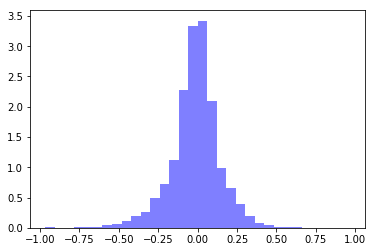

In [514]:
#POR histogram
num_bins = 32
_, bins, patches = plt.hist(W.flatten(), num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.show()
def quantization(weight_input, num_states):
    if num_states <= 1:
        print("not even binary... Error\n")
        return
    
    # the histogram of the data
    W = copy.deepcopy(weight_input)
    # b = copy.deepcopy(b_input)
    # 4 bits : 16 states; 8 bits : 256 states  
    
    # states = 3 
    n = num_states // 2
    lite_W = W
    
    # approach-1 linearly distribute the bins, convert any num between -1, 1 to some x/8
    lite_W *= (n+1)
    
    lite_W = lite_W.astype(int)
    
    lite_W = lite_W.astype(float)
    lite_W *= (1/n)
    # print(lite_W[ind])

    # reduced precision histogram
    # n, bins, patches = plt.hist(lite_W.flatten(), num_bins, normed=1, facecolor='blue', alpha=0.5)
    # plt.show()
    return lite_W

def inference(weight_input, b_input, num_states):

    lite_W = quantization(weight_input,num_states)
    
    #print(b)
    #print(lite_W)
    
    new_model.layers[2].set_weights([lite_W, b])
    score = new_model.evaluate(X_test, y_test, verbose=0)
    print("num of states = %d: %s: %.2f%%" % (num_states, new_model.metrics_names[1], score[1]*100))
    return score[1]*100


    
#print(W[:,4])

In [588]:
list_nums_states = [2,3,4,6,8,10,16,24,32,48,64,256]

def precisionScan(weight, b, list_nums_states):
    list_accuracy = []
    for n in list_nums_states:
        accuracy = inference(weight, b, n)
        list_accuracy.append(accuracy)
    """
    fig = plt.figure()
    ax = plt.gca()
    plt.plot(list_nums_states, list_accuracy)
    ax.set_xscale('log', basex=2)
    ax.set_xticks([2, 4, 8, 16, 32, 64])
    """
    return list_accuracy
list_accuracy_ideal = precisionScan(origin_weight, origin_b, list_nums_states)

num of states = 2: categorical_accuracy: 25.08%
num of states = 3: categorical_accuracy: 25.08%
num of states = 4: categorical_accuracy: 72.33%
num of states = 6: categorical_accuracy: 78.50%
num of states = 8: categorical_accuracy: 84.50%
num of states = 10: categorical_accuracy: 87.66%
num of states = 16: categorical_accuracy: 90.16%
num of states = 24: categorical_accuracy: 90.76%
num of states = 32: categorical_accuracy: 91.24%
num of states = 48: categorical_accuracy: 90.93%
num of states = 64: categorical_accuracy: 91.26%
num of states = 256: categorical_accuracy: 91.29%


In [603]:
#add some random noise, say +/- 20%


noise_levels = [0.10, 0.20]
dict_noise_results = {}
for noise_level in noise_levels:
    list_accuracy_noise = []
    noise = (np.random.rand(origin_weight.shape[0],origin_weight.shape[1])-0.5)*2 # random noise from (-1,1)

    noise_weight = origin_weight + noise*noise_level
    noise_b = origin_b  # np.ones_like(origin_b)

    #score = new_model.evaluate(X_test, y_test, verbose=0)

    dict_noise_results[noise_level] = precisionScan(noise_weight, noise_b, list_nums_states)

print(dict_noise_results)
    


num of states = 2: categorical_accuracy: 41.81%
num of states = 3: categorical_accuracy: 41.81%
num of states = 4: categorical_accuracy: 77.59%
num of states = 6: categorical_accuracy: 79.16%
num of states = 8: categorical_accuracy: 84.96%
num of states = 10: categorical_accuracy: 88.77%
num of states = 16: categorical_accuracy: 89.64%
num of states = 24: categorical_accuracy: 90.80%
num of states = 32: categorical_accuracy: 90.77%
num of states = 48: categorical_accuracy: 90.87%
num of states = 64: categorical_accuracy: 90.95%
num of states = 256: categorical_accuracy: 90.91%
num of states = 2: categorical_accuracy: 56.00%
num of states = 3: categorical_accuracy: 56.00%
num of states = 4: categorical_accuracy: 73.36%
num of states = 6: categorical_accuracy: 79.35%
num of states = 8: categorical_accuracy: 82.29%
num of states = 10: categorical_accuracy: 84.40%
num of states = 16: categorical_accuracy: 85.60%
num of states = 24: categorical_accuracy: 84.69%
num of states = 32: categoric

0.1
[41.810000000000002, 41.810000000000002, 77.590000000000003, 79.159999999999997, 84.960000000000008, 88.77000000000001, 89.640000000000001, 90.799999999999997, 90.769999999999996, 90.86999999999999, 90.950000000000003, 90.909999999999997]


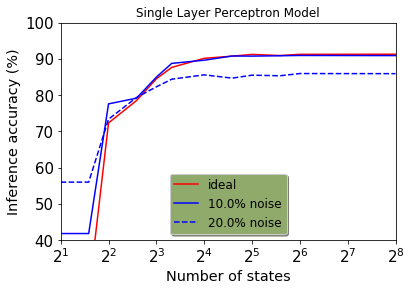

In [607]:
#plt.cla()
noise_levels = [0.10, 0.20]
summ_fig = plt.figure()
ax = plt.gca()

plt.axis([2, 256, 40, 100])

print(noise_levels[0])
print(dict_noise_results[noise_levels[0]])
#plt.plot(list_nums_states, list_accuracy_noise)
# red dashes, blue squares and green triangles
plt.plot(list_nums_states, list_accuracy_ideal, 'r-', label = "ideal") 
plt.plot(list_nums_states, dict_noise_results[noise_levels[0]], 'b-', label = "%.1f% % noise" % (noise_levels[0]*100))
plt.plot(list_nums_states, dict_noise_results[noise_levels[1]], 'b--', label = "%.1f% % noise" % (noise_levels[1]*100))

ax.set_xscale('log', basex=2)
ax.set_xticks([2, 4, 8, 16, 32, 64, 128, 256])
plt.tick_params(axis='both', which='major', labelsize=15)

plt.xlabel('Number of states',fontsize='x-large')
plt.ylabel('Inference accuracy (%)', fontsize='x-large')
plt.title('Single Layer Perceptron Model')

legend = ax.legend(loc='lower center', shadow=True, fontsize='large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#90AA6C')
plt.show()
plt.clf()
#intuition: degree of freedom is about 10 so 10+ states needed to get over the cliff,
#higher precision is needed if the problem is more complex

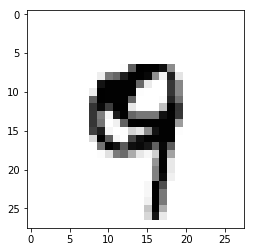

9


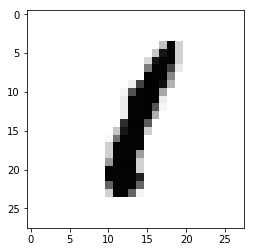

1


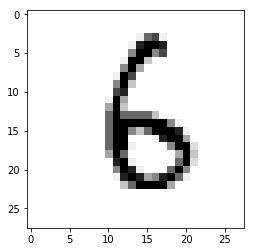

6


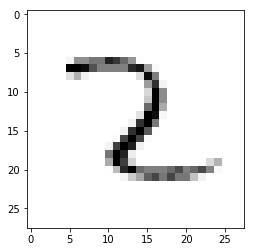

2


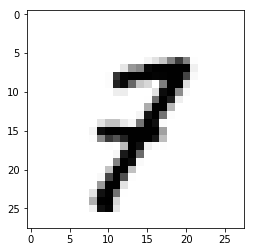

7


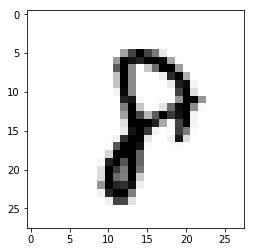

8


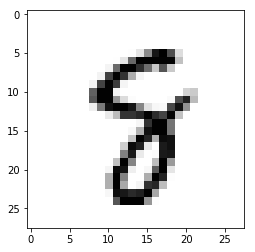

8


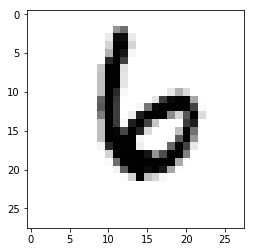

6


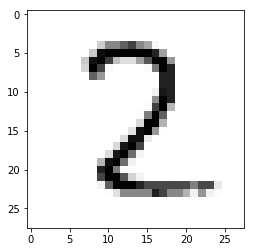

2


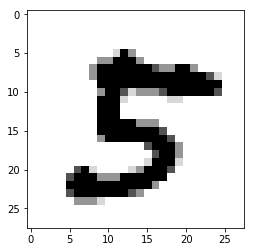

5


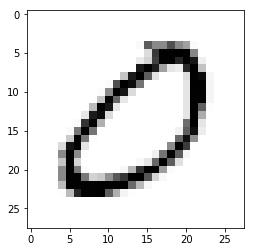

0


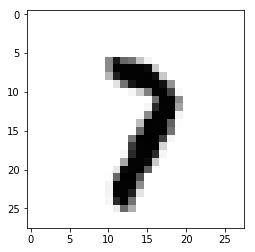

7
 9952/10000 [============================>.] - ETA: 0s[0.056280462153255939, 0.98280999851226802]


In [430]:
"""
debug
"""
W = copy.deepcopy(origin_weight) # origin_weight noise
b = copy.deepcopy(origin_b) # origin_b noise_b
# 4 bits : 16 states; 8 bits : 256 states  
# states = 3 
num_states = 64
n = num_states // 2
lite_W = W
# approach-1 linearly distribute the bins, convert any num between -1, 1 to some x/8
lite_W *= (n+1)

lite_W = lite_W.astype(int)

lite_W = lite_W.astype(float)
lite_W *= (1/n)
# print(lite_W[ind])

# reduced precision histogram
# n, bins, patches = plt.hist(lite_W.flatten(), num_bins, normed=1, facecolor='blue', alpha=0.5)
# plt.show()

#print(b)
#print(lite_W)

new_model.layers[2].set_weights([lite_W, b])
list_index = [4444, 3605, 3000, 2500,605,601,603,607,609,710,704,702]
for i in list_index:
    image_index = i
    fig = plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
    pred = new_model.predict(X_test[image_index].reshape(1, 28, 28, 1))

    plt.show()
    print(pred.argmax())
score = new_model.evaluate(X_test, y_test)
print(score)
#print(new_model.layers[2].get_weights())
#print("num of states = %d: %s: %.2f%%" % (num_states, new_model.metrics_names[1], score[1]*100))

In [551]:
from keras.models import load_model
#model = load_model('./model.h5')

loaded_model = load_model('./model_single_layer_CNN.h5')
model.summary()
for i, layer in enumerate(loaded_model.layers):
    
    weights = layer.get_weights()
    print(i, len(weights))
    if len(weights) > 1:
        print(np.amin(weights[0]), np.amax(weights[0]), min(weights[1]), max(weights[1]))
    for elem in weights:
        print(elem.shape)
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
"""
debug
"""


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_18 (Convolution2D) (None, 26, 26, 32)    320         convolution2d_input_9[0][0]      
____________________________________________________________________________________________________
maxpooling2d_10 (MaxPooling2D)   (None, 13, 13, 32)    0           convolution2d_18[0][0]           
____________________________________________________________________________________________________
dropout_11 (Dropout)             (None, 13, 13, 32)    0           maxpooling2d_10[0][0]            
____________________________________________________________________________________________________
flatten_29 (Flatten)             (None, 5408)          0           dropout_11[0][0]                 
___________________________________________________________________________________________

'\ndebug\n'

num of states = 2: acc: 15.51%
num of states = 3: acc: 15.51%
num of states = 4: acc: 17.26%
num of states = 6: acc: 77.14%
num of states = 8: acc: 95.97%
num of states = 10: acc: 97.67%
num of states = 16: acc: 98.31%
num of states = 24: acc: 98.45%
num of states = 32: acc: 98.73%
num of states = 48: acc: 98.76%
num of states = 64: acc: 98.88%
num of states = 256: acc: 98.91%


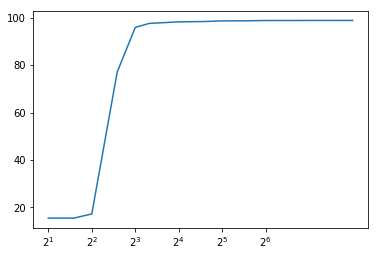

In [596]:
def inference_CNN(weights_CNN, num_states):
    
    for i, weights in enumerate(weights_CNN):
        if len(weights) > 1:
            temp_W = weights[0]
            temp_b = weights[1]
            #print(temp_W)
            lite_W = quantization(temp_W, num_states)
    
            #print(b)
            #print(lite_W)
    
            model_CNN.layers[i].set_weights([lite_W, temp_b])
    score = model_CNN.evaluate(X_test, y_test, verbose=0)
    print("num of states = %d: %s: %.2f%%" % (num_states, model_CNN.metrics_names[1], score[1]*100))
    return score[1]*100

list_nums_states = [2,3,4,6,8,10,16,24,32,48,64,256]
model_name = "./model_single_layer_CNN.h5"
def precisionScan_CNN(model_name, list_nums_states):
    model_CNN = load_model(model_name)
    list_accuracy = []
    weights_CNN = []
    for layer in model.layers:
        weights_CNN.append(layer.get_weights())
        
    for n in list_nums_states:
        
        accuracy = inference_CNN(weights_CNN, n)
        list_accuracy.append(accuracy)
    """
    fig = plt.figure()
    ax = plt.gca()
    plt.plot(list_nums_states, list_accuracy)
    ax.set_xscale('log', basex=2)
    ax.set_xticks([2, 4, 8, 16, 32, 64])
    """
    return list_accuracy
accuracy_ideal_CNN = precisionScan_CNN(model_name, list_nums_states)

In [597]:
#add some random noise, say +/- 20%
def inference_CNN_noise(weights_CNN, num_states, noise_level):
    

    noise_weight = np.multiply(origin_weight,  1+noise*noise_level)+ noise*noise_level
    for i, weights in enumerate(weights_CNN):
        if len(weights) > 1:
            #print(temp_W)np.random.randn(*a.shape)
            temp_W = weights[0]
            temp_noise = (np.random.randn(*weights[0].shape)-0.5)*2 # random noise from (-1,1)
            #lite_W = np.multiply(weights[0],  1+temp_noise*noise_level) + temp_noise*noise_level
            lite_W = weights[0] + temp_noise*noise_level
            lite_W = quantization(lite_W, num_states)
            temp_b = weights[1]
            #print(b)
            #print(lite_W)
    
            model_CNN.layers[i].set_weights([lite_W, temp_b])
    score = model_CNN.evaluate(X_test, y_test, verbose=0)
    print("num of states = %d: %s: %.2f%%" % (num_states, model_CNN.metrics_names[1], score[1]*100))
    return score[1]*100

def precisionScan_CNN_noise(model_name, list_nums_states, noise_level):
    model_CNN = load_model(model_name)
    list_accuracy = []
    weights_CNN = []
    for layer in model.layers:
        weights_CNN.append(layer.get_weights())
        
    for n in list_nums_states:
        accuracy = inference_CNN_noise(weights_CNN, n, noise_level)
        list_accuracy.append(accuracy)
    """
    fig = plt.figure()
    ax = plt.gca()
    plt.plot(list_nums_states, list_accuracy)
    ax.set_xscale('log', basex=2)
    ax.set_xticks([2, 4, 8, 16, 32, 64])
    """
    return list_accuracy

noise_levels = [0, 0.01, 0.02, 0.05, 0.1]
dict_noise_results_CNN = {}
for noise_level in noise_levels:
    dict_noise_results_CNN[noise_level] = precisionScan_CNN_noise(model_name, list_nums_states, noise_level)
print(dict_noise_results_CNN)

num of states = 2: acc: 15.51%
num of states = 3: acc: 15.51%
num of states = 4: acc: 17.26%
num of states = 6: acc: 77.14%
num of states = 8: acc: 95.97%
num of states = 10: acc: 97.67%
num of states = 16: acc: 98.31%
num of states = 24: acc: 98.45%
num of states = 32: acc: 98.73%
num of states = 48: acc: 98.76%
num of states = 64: acc: 98.88%
num of states = 256: acc: 98.91%
num of states = 2: acc: 14.72%
num of states = 3: acc: 12.18%
num of states = 4: acc: 19.12%
num of states = 6: acc: 71.45%
num of states = 8: acc: 91.76%
num of states = 10: acc: 96.62%
num of states = 16: acc: 97.60%
num of states = 24: acc: 98.54%
num of states = 32: acc: 98.47%
num of states = 48: acc: 98.50%
num of states = 64: acc: 98.66%
num of states = 256: acc: 98.60%
num of states = 2: acc: 8.84%
num of states = 3: acc: 11.35%
num of states = 4: acc: 17.07%
num of states = 6: acc: 53.24%
num of states = 8: acc: 86.96%
num of states = 10: acc: 92.90%
num of states = 16: acc: 95.31%
num of states = 24: ac

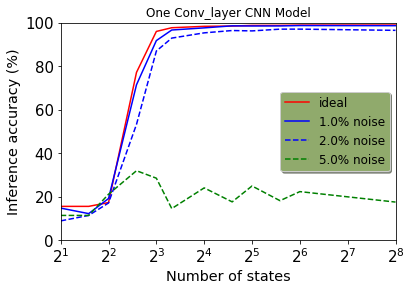

In [610]:
noise_levels = [0, 0.01, 0.02, 0.05, 0.1]
summ_fig = plt.figure()
ax = plt.gca()
#plt.plot(list_nums_states, list_accuracy_noise)
# red dashes, blue squares and green triangles
plt.plot(list_nums_states, accuracy_ideal_CNN, 'r-', label = "ideal") 
plt.plot(list_nums_states, dict_noise_results_CNN[noise_levels[1]], 'b-', label = "%.1f% % noise" % (noise_levels[1]*100))
plt.plot(list_nums_states, dict_noise_results_CNN[noise_levels[2]], 'b--', label = "%.1f% % noise" % (noise_levels[2]*100))
plt.plot(list_nums_states, dict_noise_results_CNN[noise_levels[3]], 'g--', label = "%.1f% % noise" % (noise_levels[3]*100))
plt.axis([2, 64, 0, 100])
ax.set_xscale('log', basex=2)
ax.set_xticks([2, 4, 8, 16, 32, 64, 128, 256])
legend = ax.legend(loc='center right', shadow=True, fontsize='large')


plt.tick_params(axis='both', which='major', labelsize=15)

plt.xlabel('Number of states',fontsize='x-large')
plt.ylabel('Inference accuracy (%)', fontsize='x-large')
plt.title('One Conv_layer CNN Model')


# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#90AA6C')
plt.show()
plt.clf()
#intuition:

In [ ]:
# approach-2 based on the distribution of W, customized the bins like
# -0.7, -0.5, 0.45, 0.45, 0.6,